First we must install our needed packages with conda to do this run the following in the console

conda install -c anaconda networkx

conda create --name gt -c conda-forge graph-tool

conda activate gt

conda install -n gt -c conda-forge ipython jupyter

conda install -c conda-forge graph-tool



In [2]:
from graph_tool.all import *
import matplotlib.pyplot as plt

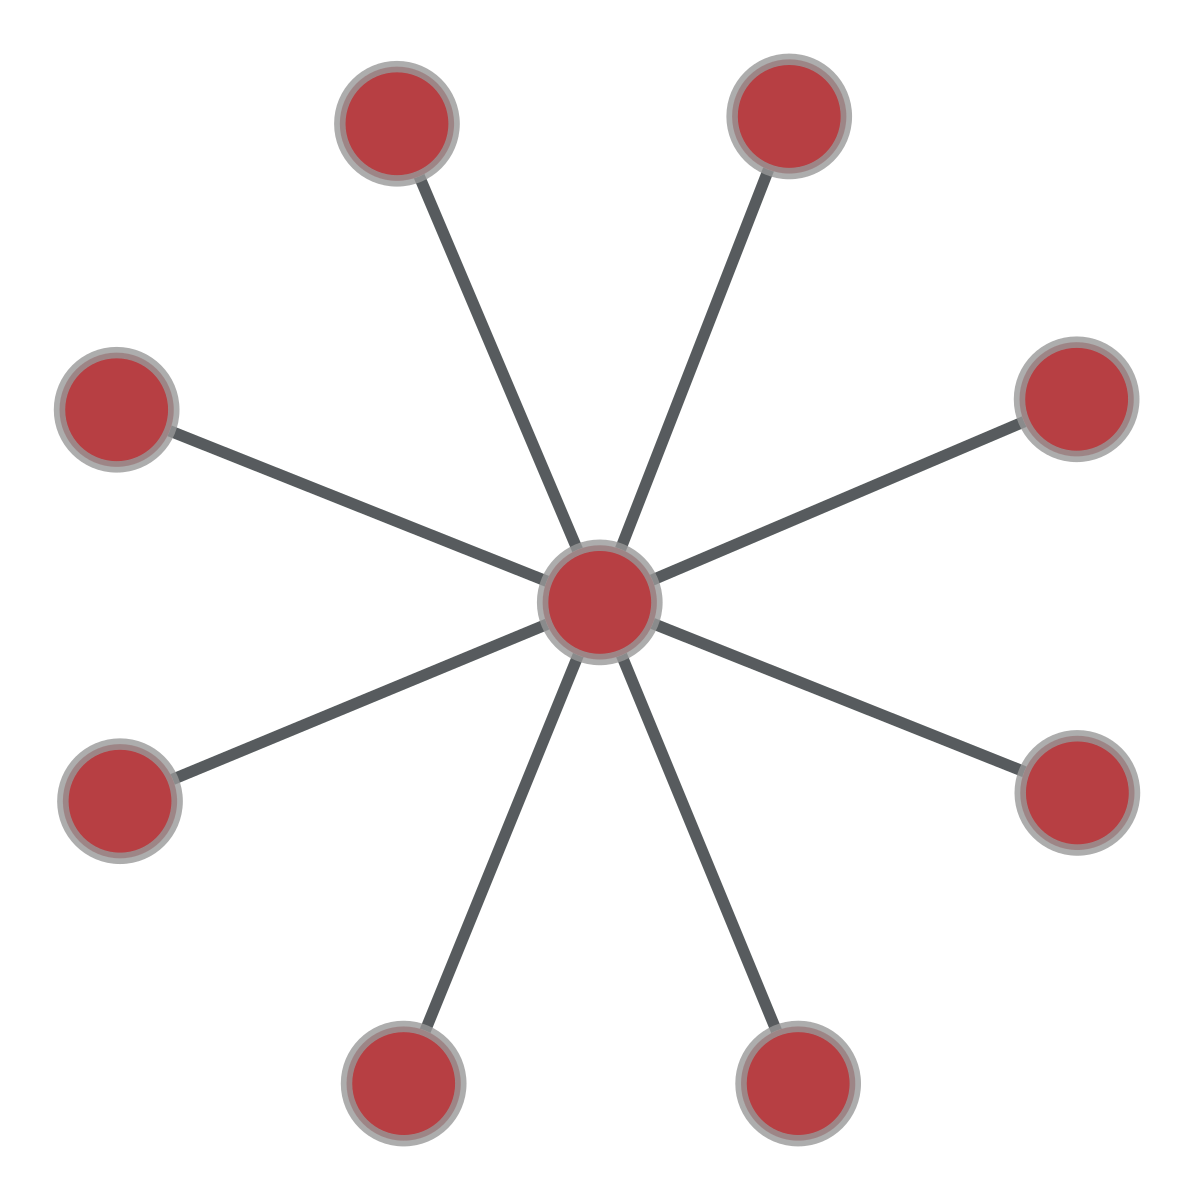

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17803b2d0, at 0x17acf1ad0>

In [ ]:
g= gt.price_network(9, m=1, c=None, gamma=1, directed=False, seed_graph=None)

gt.graph_draw(g)

Now lets try and take a look at code for  sub linear pref attachment

In [1]:
import random
from graph_tool.all import *

# Number of nodes in the network
num_nodes = 30000
i=0
# Create a Graph
g = Graph()

# Create a property map to store node types
node_types = g.new_vertex_property("string")
vprop_color = g.new_vertex_property("vector<double>")


#Create list that stores node type by index

nodes_type_list = []

# Add initial nodes with types and edges
v0 = g.add_vertex()
v1 = g.add_vertex()
node_types[v0] = "A"
node_types[v1] = "B"
e = g.add_edge(v0, v1)
vprop_color[v0] = (1, 0, 0, 1)  # Red for type 'A'
vprop_color[v1] = (0, 0, 1, 1)  # Blue for type 'B'
nodes_type_list.append(node_types[v0])
nodes_type_list.append(node_types[v1])

# Probability parameter for sublinear preferential attachment
alpha = 0.5  # Adjust as needed

beta = 0.95

# Simulate the growth of the network
for new_node in range(2, num_nodes):
    # Calculate the probability of connecting to existing nodes using sublinear preferential attachment
    probabilities = []
    new_node_type = "A" if random.random() < 0.5 else "B"  # Assign type 'A' or 'B' probabilistically
    nodes_type_list.append(new_node_type)
    v_new = g.add_vertex()
    node_types[v_new] = new_node_type
    if new_node_type == "A":
        vprop_color[v_new] = (1, 0, 0, 1)
    else:
        vprop_color[v_new] = (0, 0, 1, 1)

    for v in g.vertices():
        degree = v.out_degree()
        node_type = node_types[v]
        
        # Adjust the attachment probability based on the node type
        if node_type == new_node_type:
            attachment_prob = degree ** alpha * beta
        else:
            attachment_prob = (degree ** alpha) * (1 - beta)
        
        probabilities.append(attachment_prob)
    
    # Normalize the probabilities
    total_prob = sum(probabilities)
    probabilities = [prob / total_prob for prob in probabilities]
    
    # Choose a node to connect to based on the probabilities
    target_node = random.choices(list(g.vertices()), probabilities)[0]
    
    # Add the new node and create an edge to the selected target node
    g.add_edge(v_new, target_node)

# Create a layout and draw the graph
pos = sfdp_layout(g)
graph_draw(g, pos=pos, vertex_fill_color=vprop_color, output_size=(8000, 6000), output="sublinear_attachment_with_type.png")

In [ ]:
pos = sfdp_layout(g)
graph_draw(g, pos=pos, vertex_fill_color=vprop_color, output_size=(8000, 6000), output="sublinear_attachment_with_type.png")


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x18118ac10, at 0x116d1c690>

In [7]:
#page rank
pr = graph_tool.centrality.pagerank(g)
pr_mapping_dict = {pr[i]: i for i in range(g.num_vertices())}

In [4]:
vp = graph_tool.centrality.betweenness(g)
bt_mapping_dict = {vp[0][i]: i for i in range(g.num_vertices())}

In [5]:
cl= graph_tool.centrality.closeness(g)
cl_mapping_dict = {cl[i]: i for i in range(g.num_vertices())}

In [6]:
kc = graph_tool.topology.kcore_decomposition(g, vprop=None)
kc_dict = {kc[i]: i for i in range(g.num_vertices())}


In [9]:
cl_mapping_dict
sum(probabilities)

0.9999999999994045